<a href="https://colab.research.google.com/github/poppath5/DSEs-03/blob/master/DSE_RecomendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction of NMF for recommendation systems

SLIDES -> [please click](https://docs.google.com/presentation/d/119Foj6P_X2t1RxCW1TFvrYI-pMOyV2kQgUgHSvccya0/edit?usp=sharing)

In [ ]:
a = 1
b = 2
a + b

3

# Prepare Data

In [ ]:
!gdown --id 1woyznL9rtKIALYdfKulYyxtjetcST4HU
!gdown --id 1mCwvXi4P0LjNHi_H-B9QSXHXopKPrM7d
!gdown --id 1dk-CILCnNi7Q3YrJEcjmuxRHLxBmNdKF

Downloading...
From: https://drive.google.com/uc?id=1woyznL9rtKIALYdfKulYyxtjetcST4HU
To: /content/movie_rating.zip
100% 675k/675k [00:00<00:00, 92.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mCwvXi4P0LjNHi_H-B9QSXHXopKPrM7d
To: /content/movie_meta.zip
12.8MB [00:00, 35.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dk-CILCnNi7Q3YrJEcjmuxRHLxBmNdKF
To: /content/movie_link_small.csv
100% 183k/183k [00:00<00:00, 68.1MB/s]


In [ ]:
www.kaggle.com

In [ ]:
!unzip movie_rating.zip
!unzip movie_meta.zip

Archive:  movie_rating.zip
  inflating: ratings_small.csv       
Archive:  movie_meta.zip
  inflating: movies_metadata.csv     


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
moviemeta = pd.read_csv('movies_metadata.csv')
moviemeta.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
ratingdat = pd.read_csv('ratings_small.csv')
ratingdat

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
linkdat = pd.read_csv('movie_link_small.csv')
linkdat.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
moviedat = linkdat.join(moviemeta,on='tmdbId',how='left')
moviedat

,movieId,imdbId,tmdbId,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,114709,862.0,False,NaN,0,[],NaN,101230,tt0109001,nl,06,"Sarah, 30, single, well educated, likes art, p...",0.062128,/xnsvk2a8BbvGfnFdynKSuA4qVFq.jpg,[],[],1994-09-01,0.0,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,NaN,1-900,False,5.0,1.0
1,2,113497,8844.0,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,48677,tt0087065,en,Cloak & Dagger,11-year-old Davey's mother is dead and his fat...,9.73502,/8dmtQGw1IHbs8V93EWrfbwtLgi6.jpg,"[{'name': 'Universal Pictures', 'id': 33}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1984-08-10,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You can cry 'wolf' once too often!,Cloak & Dagger,False,6.2,40.0
2,3,113228,15602.0,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 99, 'name...",http://www.the2escobars.com,53190,tt2700330,en,The Two Escobars,"Pablo Escobar was the richest, most powerful d...",0.758472,/ctmHQio07EMng7dtUvaG8ZLxawk.jpg,[],[],2010-06-22,0.0,100.0,[],Released,Sometimes it really is a matter of life and de...,The Two Escobars,False,7.6,14.0
3,4,114885,31357.0,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",NaN,137310,tt0472576,en,Wild Hearts,"When Bob Hart, a widowed police detective tryi...",1.05851,/fLl99MgxsumFK9gTyzzkxDjMJJE.jpg,"[{'name': 'Larry Levinson Productions', 'id': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-07-08,0.0,84.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Wild Hearts,False,5.0,4.0
4,5,113041,11862.0,False,"{'id': 325798, 'name': 'Star Crash Collection'...",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 878, 'n...",NaN,22049,tt0079946,en,Starcrash,A pair of smugglers manage to pick up a castaw...,1.98658,/hOx1RiBsqNWaKnFelJ9wWk7fAJa.jpg,"[{'name': 'New World Pictures', 'id': 1950}, {...","[{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_...",1978-12-21,0.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A galactic adventure beyond your wildest dreams!,Starcrash,False,4.3,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9120,162672,3859980,402672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9121,163056,4262980,315011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9122,163949,2531318,391698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9123,164977,27660,137608.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Create User X Rating matrix

In [ ]:
ratingdat.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
cmat = pd.crosstab(ratingdat['userId'],ratingdat['movieId'],ratingdat['rating'],aggfunc=sum)

In [ ]:
cmat

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cmat = cmat.fillna(0)
cmat

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Decompose Matrix into two matrices using NMF

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(100)
nmf.fit(cmat)



NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=100, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
cmat

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
H = pd.DataFrame(np.round(nmf.components_,2), columns=cmat.columns)
H

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,28.29,1.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.57,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,2.93,4.15,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.05,0.0
1,1.59,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.39,0.00,0.00,0.00,0.00,0.0,0.00,0.03,0.10,0.0,0.00,0.00,1.67,0.0,0.00,0.0,0.0,1.88,0.04,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
2,0.30,1.84,0.13,0.07,0.28,0.54,0.10,0.06,0.11,2.84,1.25,0.07,0.07,0.00,0.14,0.00,0.20,0.00,1.37,0.21,1.06,0.76,0.49,0.11,0.00,0.0,0.23,0.00,0.00,0.0,0.87,0.92,1.65,0.0,0.00,0.0,0.0,1.88,0.04,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
3,1.89,1.16,1.46,0.00,0.00,0.00,1.40,0.00,0.00,2.17,0.00,0.00,0.00,0.00,0.00,1.99,0.00,2.01,0.90,0.05,2.30,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,1.56,1.25,0.02,0.0,0.34,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
4,0.35,0.00,0.00,0.00,0.00,0.25,0.20,0.00,0.00,0.00,0.30,0.00,0.00,0.35,0.00,0.40,0.50,0.00,0.00,0.00,0.40,0.00,0.00,0.00,0.45,0.0,0.00,0.00,0.00,0.0,0.00,0.40,0.40,0.0,0.40,0.0,0.0,0.30,0.00,0.0,...,0.0,0.00,0.4,0.00,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35,0.4,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.00,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.18,0.0,0.00,0.30,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
96,0.34,0.00,0.00,0.00,0.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.05,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.4,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
97,0.48,0.42,0.18,0.28,0.02,0.00,0.47,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.22,0.0,0.02,0.02,0.00,0.0,0.00,0.00,0.04,0.0,0.00,0.0,0.0,0.37,0.00,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
98,0.32,0.23,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.28,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.38,0.00,0.0,...,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00

In [ ]:
W = pd.DataFrame(np.round(nmf.transform(cmat),2), columns=H.index)
W

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.01,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.04,0.0,0.00,0.00,0.0,0.0,0.02,0.0,0.00,...,0.0,0.0,0.00,0.00,0.00,0.0,0.01,0.0,0.0,0.00,0.00,0.00,0.08,0.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.03,0.0,0.00,0.00,0.0
1,0.00,0.00,0.77,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.01,0.0,0.02,0.0,0.03,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.04,0.0,0.00,1.05,0.00,0.0,0.00,0.00,0.0
2,0.02,0.00,0.12,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.10,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.09,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.03,0.0,0.0,0.12,0.00,0.00,0.00,0.0,0.00,0.0,0.02,0.42,0.0,0.00,0.0,0.0,0.05,0.00,0.0,0.32,0.03,0.00,0.0,0.04,0.22,0.0
3,0.00,0.00,0.03,0.0,0.0,0.55,0.0,0.0,0.00,0.11,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.11,0.0,1.73,0.0,0.0,0.00,0.00,0.00,0.75,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,1.31,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.01,0.0,0.00,0.00,0.0
4,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.02,0.00,0.85,0.0,0.12,0.0,0.0,0.01,0.00,0.31,0.00,0.00,0.00,0.0,0.0,1.17,0.00,0.08,0.03,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.32,0.11,0.0,0.13,0.00,0.00,0.0,0.25,0.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.00,0.00,0.40,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.09,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.07,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.06,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,1.62,0.00,0.0,0.00,0.00,0.0
667,0.00,0.00,0.01,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.01,0.00,0.0,0.01,0.01,0.0,0.0,0.00,0.0,0.22,...,0.0,0.0,0.00,0.00,0.00,0.0,0.04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.06,0.00,0.01,0.0,0.03,0.0,0.00,0.00,0.0,0.22,0.0,0.0,0.07,0.00,0.0,0.00,0.01,0.01,0.0,0.00,0.00,0.0
668,0.00,0.01,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.02,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.23,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.02,0.00,0.00,0.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.02,0.0,0.00,0.36,0.0,0.00,0.0,0.0,0.00,0.00,0.0,1.02,0.03,0.00,0.0,0.00,0.00,0.0
669,0.00,0.00,0.07,0.0,0.0,0.00,0.0,0.0,0.08,0.00,0.0,0.00,0.00,0.07,0.03,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.08,0.0,0.0,0.00,0.0,0.17,...,0.0,0.0,0.00,0.04,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.10,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.05,0.0,0.18,0.1,0.0,0.00,0.00,0.0,0.06,0.40,0.00,0.0,0.00,0.00,0.0


In [ ]:
reconstructed = pd.DataFrame(np.round(np.dot(W,H),2), columns=cmat.columns)
reconstructed.index = cmat.index
reconstructed

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.03,0.03,0.01,0.00,0.00,0.07,0.02,0.00,0.02,0.03,0.06,0.00,0.00,0.01,0.00,0.03,0.04,0.00,0.04,0.00,0.05,0.00,0.00,0.02,0.06,0.00,0.00,0.03,0.03,0.00,0.01,0.09,0.10,0.01,0.06,0.0,0.00,0.06,0.00,0.00,...,0.0,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.00,0.0,0.01,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.01,0.00,0.00,0.0
2,0.94,1.46,0.10,0.10,0.23,0.85,0.14,0.05,0.09,2.20,1.26,0.06,0.05,0.23,0.11,0.66,1.15,0.40,1.10,0.16,1.48,0.80,0.38,0.15,1.01,0.18,0.18,0.41,0.68,0.46,0.78,1.75,2.06,0.55,1.01,0.0,0.01,1.78,0.07,0.40,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
3,0.92,0.37,0.03,0.02,0.10,0.22,0.04,0.02,0.06,0.38,0.29,0.01,0.01,0.01,0.04,0.30,0.10,0.02,0.28,0.03,0.16,0.12,0.06,0.16,0.13,0.01,0.04,0.01,0.05,0.01,0.14,0.47,0.35,0.02,0.24,0.0,0.00,0.44,0.01,0.01,...,0.0,0.01,0.0,0.01,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.01,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
4,3.03,1.33,0.42,0.03,0.12,0.20,0.14,0.00,0.13,1.15,0.61,0.03,0.31,0.05,0.00,0.23,1.09,0.13,0.32,0.02,1.01,0.21,0.01,0.35,0.77,0.00,0.01,0.00,0.81,0.05,0.04,1.62,3.31,0.00,1.17,0.0,0.02,0.77,0.20,0.09,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.01,0.0,0.00,0.00,0.0,0.0,0.03,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.0,0.00,0.00,0.00,0.0
5,1.59,1.11,0.48,0.07,0.65,0.61,0.22,0.10,0.00,0.30,1.24,0.00,0.05,0.00,0.01,1.11,0.36,0.08,0.35,0.00,0.37,0.00,0.07,0.04,0.25,0.00,0.01,0.00,0.04,0.00,0.08,0.44,1.10,0.00,0.61,0.0,0.00,1.51,0.01,0.01,...,0.0,0.04,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1.56,0.81,0.35,0.10,0.32,1.20,0.38,0.04,0.18,1.14,0.95,0.10,0.03,0.53,0.07,1.06,1.76,0.68,0.62,0.10,1.51,0.65,0.21,0.15,1.85,0.30,0.11,0.63,1.11,0.71,0.52,2.38,1.87,0.84,1.90,0.0,0.02,1.21,0.10,0.78,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
668,0.22,0.06,0.00,0.01,0.00,0.14,0.03,0.00,0.00,0.03,0.08,0.00,0.03,0.01,0.00,0.17,0.11,0.01,0.02,0.00,0.07,0.03,0.01,0.07,0.26,0.00,0.00,0.10,0.05,0.00,0.01,0.32,0.13,0.01,0.39,0.0,0.00,0.14,0.01,0.02,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
669,0.34,0.00,0.07,0.00,0.05,0.25,0.06,0.00,0.13,0.02,0.21,0.02,0.00,0.03,0.07,0.37,0.12,0.03,0.16,0.00,0.06,0.02,0.00,0.30,0.09,0.01,0.05,0.01,0.02,0.01,0.01,0.16,0.09,0.02,0.18,0.0,0.00,0.10,0.01,0.02,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0


In [ ]:
cmat

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Create Application

In [ ]:
import re

def recomendation(uid,topk=5):
  res = list(reconstructed.T[uid].sort_values(ascending=False)[0:topk].index)
  res = moviedat[moviedat['movieId'].isin(res)]
  res['genre'] = [re.findall(r"name': '(.*?)'}", res) for res in res['genres']]
  mList = ratingdat[ratingdat['userId']==uid][['movieId','rating']]
  #return mList, res
  res = res.merge(mList,on='movieId',how='left')
  #return res
  res = res[['movieId','title','genre','rating']]
  return res



In [ ]:
res = recomendation(10,topk=20)
res

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movieId,title,genre,rating
0,110,The Tie That Binds,[Thriller],NaN
1,260,Dracula: Dead and Loving It,"[Comedy, Horror]",NaN
2,318,Nell,"[Drama, Thriller]",4.0
3,356,Nixon,"[History, Drama]",NaN
4,480,Vanya on 42nd Street,"[Drama, Romance]",NaN
5,589,New York Cop,"[Action, Thriller, Crime, Drama]",NaN
6,593,Miami Rhapsody,"[Comedy, Romance]",NaN
7,1036,Bhaji on the Beach,"[Comedy, Drama]",3.0
8,1196,Lethal Weapon,"[Adventure, Action, Comedy, Thriller, Crime]",4.0
9,1197,Get Real,"[Drama, Romance]",4.0


In [ ]:
res1 = list(reconstructed.T[10].sort_values(ascending=False)[0:5].index)

In [ ]:
res1 = moviedat[moviedat['movieId'].isin(res1)]
res1 = res1.iloc[0]
res1genre = res1['genres']
re.findall(r"name': '(.*?)'}", res1genre)

['Comedy', 'Horror']

In [ ]:
res['genre'].iloc[0]

['Thriller']

In [ ]:
recomendation(10,topk=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movieId,title,genre,rating
0,50,Jack & Sarah,"[Comedy, Drama, Romance]",5.0
1,110,The Tie That Binds,[Thriller],NaN
2,260,Dracula: Dead and Loving It,"[Comedy, Horror]",NaN
3,296,The Substitute,"[Action, Thriller]",NaN
4,318,Nell,"[Drama, Thriller]",4.0
5,356,Nixon,"[History, Drama]",NaN
6,380,Doraemon:貓狗時空傳,[],NaN
7,480,Vanya on 42nd Street,"[Drama, Romance]",NaN
8,527,Cabin Boy,[Comedy],NaN
9,541,The Juror,"[Drama, Thriller]",NaN


In [ ]:
mList = ratingdat[ratingdat['userId']==1][['movieId','rating']]
mList

,movieId,rating
0,31,2.5
1,1029,3.0
2,1061,3.0
3,1129,2.0
4,1172,4.0
5,1263,2.0
6,1287,2.0
7,1293,2.0
8,1339,3.5
9,1343,2.0


[]

In [ ]:
res = moviedat[moviedat['movieId'].isin(res1)]

In [ ]:
res

,movieId,imdbId,tmdbId,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
10,11,112346,9087.0,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,11210,tt0117496,en,Robinson Crusoe,Robinson Crusoe flees Britain on a ship after ...,8.73917,/zw4WnOwGuYzTewfiQQKkeGqADlo.jpg,"[{'name': 'Miramax', 'id': 53009}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-06-11,0.0,92.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,NaN,Robinson Crusoe,False,5.7,52.0
82,88,115697,13997.0,False,"{'id': 353708, 'name': 'Kill Buljo Collection'...",160000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,17285,tt0913401,no,Kill Buljo,Jompa Tormann and his guests and family are br...,0.629188,/by6vHu8y3tUzMX7DTXLOJr5fYnZ.jpg,"[{'name': 'Yellow Bastard Production', 'id': 4...","[{'iso_3166_1': 'NO', 'name': 'Norway'}]",2007-03-23,0.0,93.0,"[{'iso_639_1': 'no', 'name': 'Norsk'}]",Released,In Kautokeino no one can hear you scream.,Kill Buljo,False,6.6,12.0
232,260,76759,11.0,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,12110,tt0112896,en,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,5.43033,/xve4cgfYItnOhtzLYoTwTVy5FGr.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-12-22,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Dracula: Dead and Loving It,False,5.7,210.0


In [ ]:
res['genres']

10     [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
82     [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
232    [{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...
Name: genres, dtype: object

In [ ]:
moviedat

,movieId,imdbId,tmdbId,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,114709,862.0,False,NaN,0,[],NaN,101230,tt0109001,nl,06,"Sarah, 30, single, well educated, likes art, p...",0.062128,/xnsvk2a8BbvGfnFdynKSuA4qVFq.jpg,[],[],1994-09-01,0.0,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,NaN,1-900,False,5.0,1.0
1,2,113497,8844.0,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,48677,tt0087065,en,Cloak & Dagger,11-year-old Davey's mother is dead and his fat...,9.73502,/8dmtQGw1IHbs8V93EWrfbwtLgi6.jpg,"[{'name': 'Universal Pictures', 'id': 33}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1984-08-10,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You can cry 'wolf' once too often!,Cloak & Dagger,False,6.2,40.0
2,3,113228,15602.0,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 99, 'name...",http://www.the2escobars.com,53190,tt2700330,en,The Two Escobars,"Pablo Escobar was the richest, most powerful d...",0.758472,/ctmHQio07EMng7dtUvaG8ZLxawk.jpg,[],[],2010-06-22,0.0,100.0,[],Released,Sometimes it really is a matter of life and de...,The Two Escobars,False,7.6,14.0
3,4,114885,31357.0,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",NaN,137310,tt0472576,en,Wild Hearts,"When Bob Hart, a widowed police detective tryi...",1.05851,/fLl99MgxsumFK9gTyzzkxDjMJJE.jpg,"[{'name': 'Larry Levinson Productions', 'id': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-07-08,0.0,84.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Wild Hearts,False,5.0,4.0
4,5,113041,11862.0,False,"{'id': 325798, 'name': 'Star Crash Collection'...",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 878, 'n...",NaN,22049,tt0079946,en,Starcrash,A pair of smugglers manage to pick up a castaw...,1.98658,/hOx1RiBsqNWaKnFelJ9wWk7fAJa.jpg,"[{'name': 'New World Pictures', 'id': 1950}, {...","[{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_...",1978-12-21,0.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A galactic adventure beyond your wildest dreams!,Starcrash,False,4.3,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9120,162672,3859980,402672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9121,163056,4262980,315011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9122,163949,2531318,391698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9123,164977,27660,137608.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## comedy horror type
userid = 398
topk = 20
recomendation(userid,topk)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movieId,title,genre,rating
0,110,The Tie That Binds,[Thriller],NaN
1,260,Dracula: Dead and Loving It,"[Comedy, Horror]",NaN
2,356,Nixon,"[History, Drama]",NaN
3,541,The Juror,"[Drama, Thriller]",NaN
4,589,New York Cop,"[Action, Thriller, Crime, Drama]",NaN
5,1036,Bhaji on the Beach,"[Comedy, Drama]",NaN
6,1136,The Fan,"[Drama, Mystery, Thriller]",4.0
7,1196,Lethal Weapon,"[Adventure, Action, Comedy, Thriller, Crime]",4.0
8,1197,Get Real,"[Drama, Romance]",5.0
9,1198,White Squall,"[Action, Drama]",4.0


In [ ]:
## action thriller type
userid = 198
recomendation(userid,topk)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movieId,title,genre,rating
0,50,Jack & Sarah,"[Comedy, Drama, Romance]",NaN
1,296,The Substitute,"[Action, Thriller]",NaN
2,318,Nell,"[Drama, Thriller]",NaN
3,593,Miami Rhapsody,"[Comedy, Romance]",NaN
4,608,My Family,"[Comedy, Drama]",3.5
5,858,Farinelli,"[History, Drama]",5.0
6,904,"Ciao, Professore!","[Comedy, Foreign]",NaN
7,912,Leon: The Professional,"[Thriller, Crime, Drama]",5.0
8,1089,North,"[Comedy, Drama, Family, Fantasy, Science Fiction]",2.0
9,1213,"I, the Worst of All","[Drama, Foreign]",NaN


In [ ]:
## comedy romance drama type
userid = 38
recomendation(userid,topk)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movieId,title,genre,rating
0,50,Jack & Sarah,"[Comedy, Drama, Romance]",NaN
1,296,The Substitute,"[Action, Thriller]",5.0
2,318,Nell,"[Drama, Thriller]",4.5
3,356,Nixon,"[History, Drama]",4.5
4,527,Cabin Boy,[Comedy],4.5
5,593,Miami Rhapsody,"[Comedy, Romance]",4.5
6,858,Farinelli,"[History, Drama]",4.5
7,1213,"I, the Worst of All","[Drama, Foreign]",4.0
8,1221,Gumby: The Movie,"[Fantasy, Animation, Science Fiction, Family]",4.5
9,2028,Sweet Nothing,[],NaN


In [ ]:
reconstructed

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.03,0.03,0.01,0.00,0.00,0.07,0.02,0.00,0.02,0.03,0.06,0.00,0.00,0.01,0.00,0.03,0.04,0.00,0.04,0.00,0.05,0.00,0.00,0.02,0.06,0.00,0.00,0.03,0.03,0.00,0.01,0.09,0.10,0.01,0.06,0.0,0.00,0.06,0.00,0.00,...,0.0,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.00,0.0,0.01,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.01,0.00,0.00,0.0
2,0.94,1.46,0.10,0.10,0.23,0.85,0.14,0.05,0.09,2.20,1.26,0.06,0.05,0.23,0.11,0.66,1.15,0.40,1.10,0.16,1.48,0.80,0.38,0.15,1.01,0.18,0.18,0.41,0.68,0.46,0.78,1.75,2.06,0.55,1.01,0.0,0.01,1.78,0.07,0.40,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
3,0.92,0.37,0.03,0.02,0.10,0.22,0.04,0.02,0.06,0.38,0.29,0.01,0.01,0.01,0.04,0.30,0.10,0.02,0.28,0.03,0.16,0.12,0.06,0.16,0.13,0.01,0.04,0.01,0.05,0.01,0.14,0.47,0.35,0.02,0.24,0.0,0.00,0.44,0.01,0.01,...,0.0,0.01,0.0,0.01,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.01,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
4,3.03,1.33,0.42,0.03,0.12,0.20,0.14,0.00,0.13,1.15,0.61,0.03,0.31,0.05,0.00,0.23,1.09,0.13,0.32,0.02,1.01,0.21,0.01,0.35,0.77,0.00,0.01,0.00,0.81,0.05,0.04,1.62,3.31,0.00,1.17,0.0,0.02,0.77,0.20,0.09,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.01,0.0,0.00,0.00,0.0,0.0,0.03,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.0,0.00,0.00,0.00,0.0
5,1.59,1.11,0.48,0.07,0.65,0.61,0.22,0.10,0.00,0.30,1.24,0.00,0.05,0.00,0.01,1.11,0.36,0.08,0.35,0.00,0.37,0.00,0.07,0.04,0.25,0.00,0.01,0.00,0.04,0.00,0.08,0.44,1.10,0.00,0.61,0.0,0.00,1.51,0.01,0.01,...,0.0,0.04,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1.56,0.81,0.35,0.10,0.32,1.20,0.38,0.04,0.18,1.14,0.95,0.10,0.03,0.53,0.07,1.06,1.76,0.68,0.62,0.10,1.51,0.65,0.21,0.15,1.85,0.30,0.11,0.63,1.11,0.71,0.52,2.38,1.87,0.84,1.90,0.0,0.02,1.21,0.10,0.78,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
668,0.22,0.06,0.00,0.01,0.00,0.14,0.03,0.00,0.00,0.03,0.08,0.00,0.03,0.01,0.00,0.17,0.11,0.01,0.02,0.00,0.07,0.03,0.01,0.07,0.26,0.00,0.00,0.10,0.05,0.00,0.01,0.32,0.13,0.01,0.39,0.0,0.00,0.14,0.01,0.02,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
669,0.34,0.00,0.07,0.00,0.05,0.25,0.06,0.00,0.13,0.02,0.21,0.02,0.00,0.03,0.07,0.37,0.12,0.03,0.16,0.00,0.06,0.02,0.00,0.30,0.09,0.01,0.05,0.01,0.02,0.01,0.01,0.16,0.09,0.02,0.18,0.0,0.00,0.10,0.01,0.02,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0


In [ ]:
moviedat.iloc[100]

movieId                                                                110
imdbId                                                              112573
tmdbId                                                                 197
adult                                                                False
belongs_to_collection                                                  NaN
budget                                                            14000000
genres                                    [{'id': 53, 'name': 'Thriller'}]
homepage                                                               NaN
id                                                                   79593
imdb_id                                                          tt0114666
original_language                                                       en
original_title                                          The Tie That Binds
overview                 John Netherwood and his wife Leann are fugitiv...
popularity               

In [ ]:
from scipy.spatial.distance import cosine
my_feature = np.zeros(len(reconstructed.iloc[0]))
my_feature[100] = 5
similarity = []
for idx in range(len(reconstructed)):
  similarity.append(1 - cosine(my_feature, reconstructed.iloc[idx].values))
similarity = pd.Series(similarity).fillna(0).tolist()
close_to = np.argsort(similarity)[-1]

## comedy romance drama type
userid = close_to
recomendation(userid,topk)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movieId,title,genre,rating
0,1,1-900,[],1.0
1,3,The Two Escobars,"[Crime, Documentary]",NaN
2,6,A Farewell to Arms,"[Drama, Romance, War]",3.0
3,25,Fresh,"[Crime, Drama, Thriller]",NaN
4,32,Two If by Sea,"[Comedy, Romance]",NaN
5,36,Priest Daens,"[Drama, History]",3.0
6,62,Attack of the Killer Tomatoes!,"[Comedy, Horror, Science Fiction]",NaN
7,95,The Wind Will Carry Us,[Drama],4.0
8,141,Nacho Libre,"[Comedy, Family]",NaN
9,494,A Civil Action,[Drama],3.0


In [ ]:
from sklearn.cluster import KMeans
X = reconstructed
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
cluster = kmeans.predict(X)
X['cluster'] = cluster

In [ ]:
X['userId'] = X.index


In [ ]:
X.groupby('cluster').mean()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949,userId
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.858889,0.992963,0.462963,0.180000,0.601111,2.054074,1.135926,0.166296,0.278889,0.560370,2.400000,0.051111,0.206667,1.466667,0.086296,2.015556,2.372963,0.249630,0.541852,0.161852,2.462593,0.762593,0.368889,0.743704,2.294444,0.211852,0.207407,0.835926,0.982593,0.190741,0.447407,2.067407,3.216296,0.474074,2.171111,0.153333,0.031111,1.991111,0.137778,0.663704,...,0.001852,0.148889,0.020000,0.128519,0.000000,0.055926,0.184444,0.000000,0.055926,0.128519,0.000370,0.128519,0.000000,0.040741,0.000000,0.072593,0.036296,0.148519,0.01963,0.036296,0.092222,0.000000,0.000000,0.036296,0.072593,0.148519,0.000000,0.130370,0.148889,0.092963,0.01963,0.000000,0.000000,0.000000,0.000000,0.000000,0.001111,0.000000,0.186296,352.777778
1,1.126477,1.416932,0.409773,0.105114,0.407955,0.985909,0.341250,0.063295,0.226932,2.022045,1.101023,0.126364,0.071932,0.280682,0.114205,0.466818,0.853182,0.300568,0.993636,0.163182,1.145000,0.724091,0.404773,0.144318,0.851591,0.122841,0.174545,0.235909,0.446932,0.253864,0.668523,1.624886,1.724773,0.318523,0.855682,0.001591,0.010909,1.555341,0.075682,0.271250,...,0.000341,0.000000,0.000114,0.000114,0.000000,0.000000,0.001818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000455,0.001705,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.001591,0.000000,0.001477,0.000000,0.000000,0.000114,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.001818,0.000000,0.000000,0.000000,0.000000,350.511364
2,2.753828,1.153828,0.463984,0.119141,0.515859,1.077188,0.377578,0.046562,0.075937,1.243047,0.797422,0.175625,0.139531,0.086641,0.083359,1.279062,0.665625,0.234063,0.748984,0.065547,0.728516,0.312188,0.205078,0.238047,0.877188,0.041406,0.025156,0.139766,0.592891,0.061797,0.311719,2.036406,1.314297,0.022734,0.885781,0.001328,0.025234,1.263047,0.040000,0.166328,...,0.014531,0.000000,0.012656,0.034453,0.027266,0.000000,0.047891,0.012109,0.000000,0.031406,0.019844,0.000156,0.012188,0.011484,0.023281,0.000000,0.000000,0.027422,0.00000,0.000000,0.000156,0.046016,0.012109,0.038594,0.000000,0.000156,0.042578,0.000000,0.000000,0.000000,0.00000,0.023281,0.007891,0.012109,0.047812,0.035234,0.006094,0.004219,0.000000,334.468750
3,3.970000,3.960000,2.990000,0.000000,3.050000,0.960000,2.980000,0.000000,0.020000,2.970000,2.970000,0.990000,4.010000,0.010000,0.990000,4.010000,3.000000,1.980000,3.030000,0.000000,3.960000,4.990000,0.000000,0.000000,4.970000,0.000000,0.000000,0.010000,0.010000,4.990000,0.000000,4.010000,3.000000,1.970000,4.980000,0.000000,0.000000,5.010000,0.010000,2.960000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,564.000000
4,1.019977,0.277283,0.274637,0.038033,0.218525,0.420047,0.275012,0.022529,0.114731,0.244660,0.233700,0.074333,0.037119,0.119813,0.028829,0.263044,0.351241,0.087564,0.144426,0.022319,0.199204,0.102155,0.055504,0.088712,0.401546,0.031639,0.027471,0.063911,0.171358,0.061499,0.075597,0.753841,0.388876,0.034286,0.456674,0.002201,0.001171,0.299742,0.029859,0.102951,...,0.004520,0.000094,0.006136,0.001101,0.000094,0.000000,0.006909,0.000047,0.000000,0.000094,0.005831,0.000000,0.005316,0.007471,0.000000,0.000000,0.000000,0.000094,0.00000,0.000000,0.000000,0.007564,0.000047,0.005621,0.000000,0.000000,0.001

In [ ]:
ofeat = X.iloc[:,0:-2]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(ofeat)
pfeat = pca.transform(ofeat)

(671, 3)

In [ ]:
ndat = pd.DataFrame(data=pfeat,columns=['pca1','pca2','pca3'])

In [ ]:
X['cluster'].values

array([4, 1, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 0, 4, 2, 4, 0, 4, 1, 2,
       0, 4, 4, 2, 4, 4, 4, 0, 4, 1, 4, 2, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4,
       4, 4, 1, 2, 4, 1, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       1, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 4, 4, 1, 4, 4, 1, 1, 4, 2,
       4, 4, 4, 1, 2, 2, 2, 4, 4, 4, 4, 4, 4, 0, 4, 4, 2, 4, 4, 1, 4, 1,
       2, 4, 4, 1, 4, 4, 4, 2, 0, 2, 1, 1, 4, 4, 2, 1, 4, 2, 4, 2, 4, 4,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 2, 2, 1, 2, 4, 4,
       4, 4, 2, 4, 4, 4, 1, 4, 4, 4, 2, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 4, 4, 1, 4, 1, 2, 4, 2, 1, 4, 4, 1, 1, 4, 1, 0, 4, 4, 4,
       2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 0, 4, 4, 2, 4, 4, 4, 2, 2, 1, 0,
       2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 1, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4,
       4, 1, 4, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 1, 4, 4, 2, 2, 4, 2, 4,
       2, 1, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4,

In [ ]:
ndat['cluster'] = X['cluster'].values
ndat

,pca1,pca2,pca3,cluster
0,-12.803143,2.497708,2.800945,4
1,-6.213704,5.074096,-8.413828,1
2,-6.475616,-1.469174,1.126363,4
3,16.898714,8.135518,-7.597970,2
4,1.634332,-2.276434,-1.889773,4
...,...,...,...,...
666,-6.717886,5.452646,-4.567731,1
667,-10.162429,2.186881,3.598102,4
668,-9.773209,1.778706,1.925642,4
669,-7.913832,2.511500,1.279641,4


In [ ]:
import matplotlib.pyplot as plt

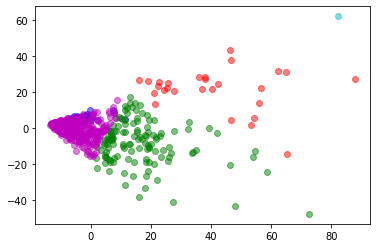

In [ ]:
clist = ['r','b','g','c','m','k']
for i in list(range(0,5)):
  sdat = ndat[ndat['cluster']==i][['pca1','pca2']].values
  plt.scatter(x=sdat[:,0], y=sdat[:,1], c=clist[i], alpha=0.5)
